In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, log_loss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

The objective of this project is to run multiple machine learning algorithms to identify the customers which will likely buy when doing online shopping. 

# Data Preprocessing

First we will start with pre-processing the data in order to correclty prepare it for the different machine learning models

In [11]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


The dataset was formed so that each session would belong to a different user in a 1 year period. 

* Administrative: This is the number of pages of this type (administrative) that the user visisted. 
* Administrative_Duration: This is the amount of time spent in this category of pages
* Informational: This is the number of pages of this type (informational) that the user visited.
* Informational_Duration: This is the amount of time spent in this category of pages.
* Product Related: This is the number of pages of this type (product related) that the user visited.
* Product Related Duration: This is the amount of time spent in this category of pages
* Bounce Rate is the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
* Exit Rate is calculated as for all pageviews to the page, the percentage that were the last in the session.
* Page Value represents the average value for a web page that a user visited before completing an e-commerce transaction.
* Special Day indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.
* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [5]:
print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))
print('Names of the variables: {}'.format(list(df.columns)))

Number of rows: 12330
Number of columns: 18
Names of the variables: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


Get some infos on the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Check null data

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

We do not have any NA values

Transform categorical variables to numeric. Machine learning models require all input and output variables to be numeric. This means that any data containing categorical data, must be encoded it to numbers

In [8]:
df['Weekend'] = df['Weekend'].map({False:0, True:1})
df['Revenue'] = df['Revenue'].map({False:0, True:1})

In [9]:
print('Unique values in Month: ',  df.Month.unique())
print('Unique values in Visitor Type: ',  df.VisitorType.unique())

Unique values in Month:  ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Unique values in Visitor Type:  ['Returning_Visitor' 'New_Visitor' 'Other']


In [10]:
data_dummies = pd.get_dummies(df,columns=['Month','VisitorType'],drop_first=True)
data_dummies.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


Number of columns increased because the dummies function adds X amount of columns to our dataframe based on how many categories our base columns have.

We create a dataframe without the categorical variables for some visualizations

In [11]:
data = pd.get_dummies(df,columns=['VisitorType'],drop_first=True)

In [12]:
data = data.drop(columns=['Month'])

Seperate the target values from the features 

In [13]:
X = data.drop('Revenue', axis=1)
y = data['Revenue']

In [14]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

X.apply(minMax)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_Other,VisitorType_Returning_Visitor
min,0,0.00,0,0.000,0,0.00000,0.0,0.0,0.000000,0.0,1,1,1,1,0,0,0
max,27,3398.75,24,2549.375,705,63973.52223,0.2,0.2,361.763742,1.0,8,13,9,20,1,1,1


# Data Visualization

## Graph 1

### Box representation of the independent variables X

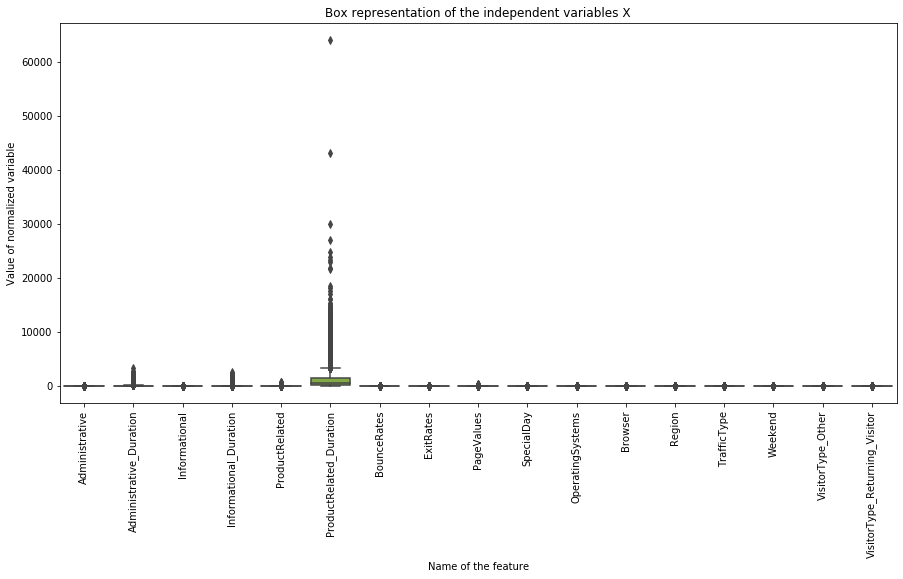

In [15]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Box representation of the independent variables X')
plt.ylabel('Value of normalized variable')
_ = plt.xlabel('Name of the feature')

This graph the value of the independent variables. We can see that all the variables are concentrated on the lower part of the graph, except for ProductRelated_Duration variable. Therefore, we will standardize the data before training our Machine Learning models.

## Graph 2

### Representation of the independent variables depending on their target value

This second graph represent the independent variables into two distributions depending on their target value. Class 1 in red means that the customer has bought online. Class 0 in green is the contrary. 

In [16]:
def represent_double_histogram(x_1, x_0, n_bins=11, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best') 
    
def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    # want one graph per column
    fig_tot = len(x.columns)
    fig_tot_row = 3.; fig_size = 5.
    num_row = int( np.ceil(fig_tot/fig_tot_row) )
    plt.figure( figsize=( fig_tot_row*fig_size+2, num_row*fig_size+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_row, fig_tot_row, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represent_double_histogram(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, 
                   density = density, title=('%s' % feat))

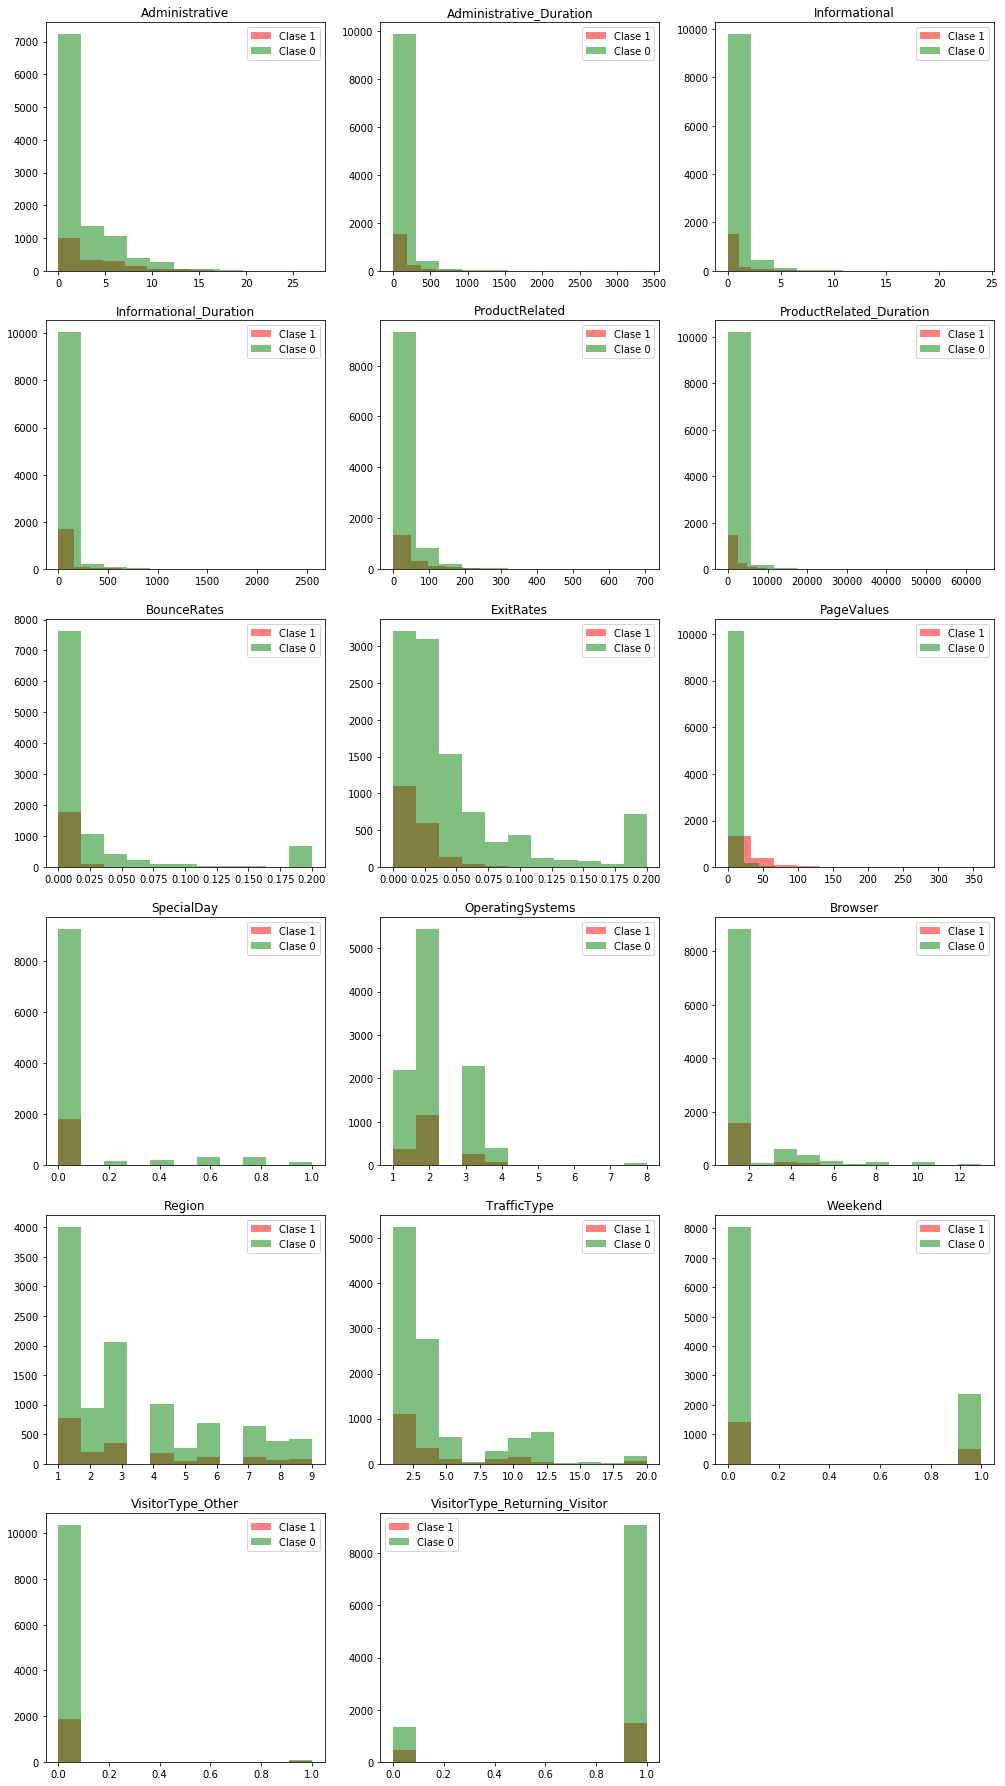

In [17]:
hist_pos_neg_feat(X,y)

 we can see that customers who complete online purchases are evenly distributed within our data. 

## Graph 3

### Correlation matrix 

Correlation matrix: A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.

Correlation coefficients are always values between -1 and 1, where -1 shows a perfect, linear negative correlation, and 1 shows a perfect, linear positive correlation.

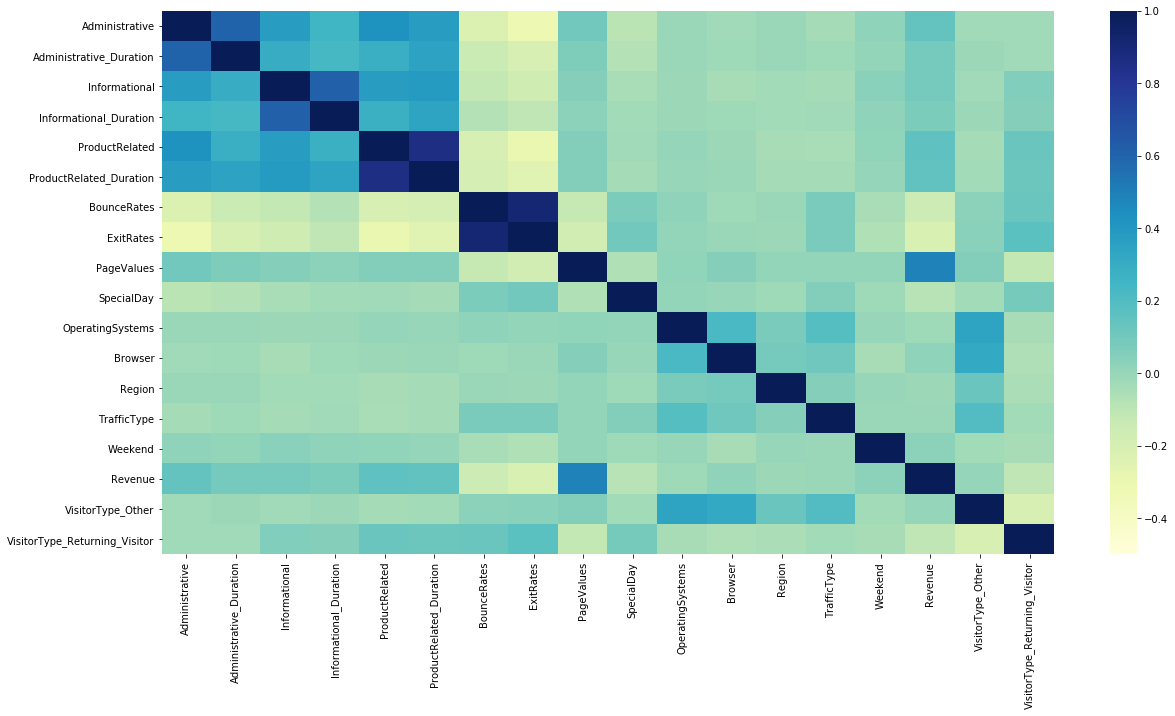

In [18]:
cor = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, vmin=-0.5, cmap="YlGnBu")

In this matrix, we can see that the two different columns that have the highest correlations are ProductRelated_Duration and ProductRelated. The yellower the cell, the closer it is to the -1 value. The bluer the cell, the closer it is to the value 1.

To see in more details the correlation values for each column

In [19]:
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Other,VisitorType_Returning_Visitor
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917,-0.021184,-0.022884
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587,-0.008542,-0.022525
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200,-0.021457,0.057399
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345,-0.013489,0.045501
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538,-0.036083,0.128738
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373,-0.027183,0.120489
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673,0.028112,0.129908
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071,0.034763,0.171987
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569,0.055204,-0.115825
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305,-0.025730,0.087123


## Graph 4

### Correlation with the revenue

In this bar graph we compare the correlations of the independent variables with the target value (Revenue)

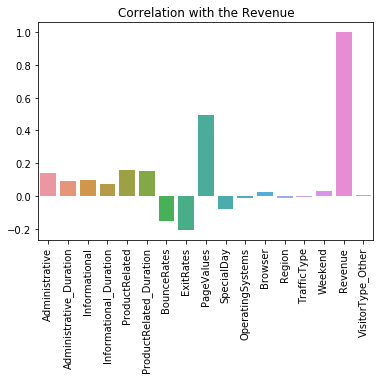

In [20]:
# take revenue correlation column
data_corr = data.corr()['Revenue'] 
# sns.barplot(x, y)
sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values).set_title('Correlation with the Revenue')
plt.xticks(rotation = 90)
plt.show()

We can see that Page Values has the highest correlation with Revenue compared to the other features.

## Graph 5

### Number of transactions completed

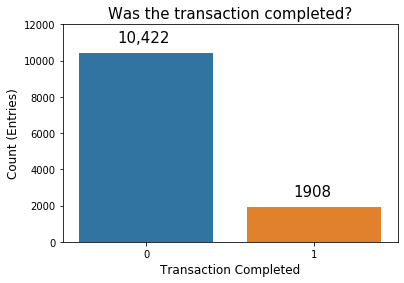

In [21]:
sns.countplot(data['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()

This shows that in 84.5% of the time, a client came online to do some shopping but did not end up buying anything.

## Graph 6

### Types of visitors

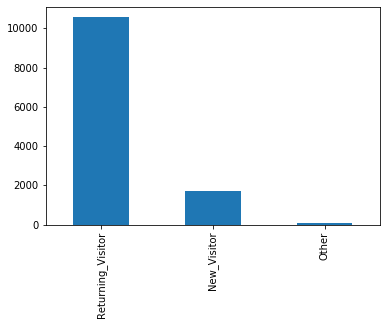

In [22]:
df['VisitorType'].value_counts().plot(kind='bar')

Returning_visitor is a client that had already been on the website before as a new_visitor is a client who has never been on the website before. 

## Graph 7

### Distribution of each month in the Month column

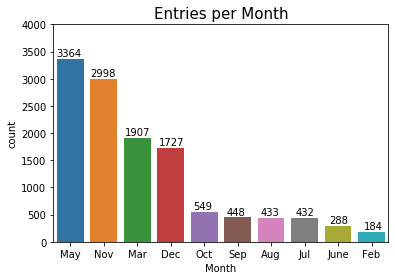

In [23]:
monthly = df['Month'].value_counts()

sns.countplot(df['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

We can see that May is the month where there was the most visitors and February the least. 

## Graph 8 

### Visualization of the different types of operating systems

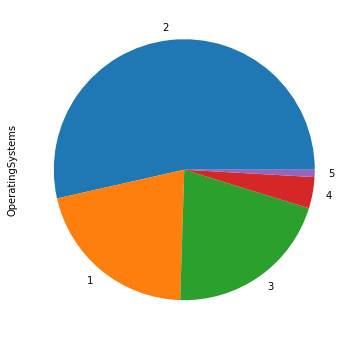

In [24]:
data['OperatingSystems'] = data['OperatingSystems'].replace([5,6,7,8],5)
os_plot = data['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.show()

 We can see that a majority of users use operating system number 2. Operating systems can indicate users of a sepcifc type of computer and may portray certain user archetypes (Windows users, Mac users, Linux users).

## Graph 9 

### Different type of browsers

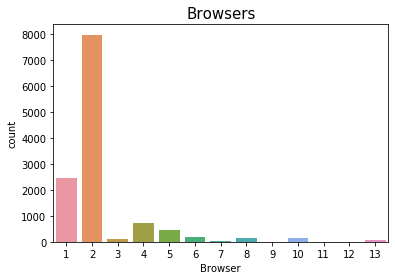

In [25]:
sns.countplot(data['Browser'])
plt.title('Browsers', fontsize=15)
plt.show()

Browser choice is even more polarizing than Operating System. Here we see that a large majority of users use browser 2, with a smaller number of users using browser 1. All other browsers represent a small subsection of online users.

## Graph 10

### Visualize the Ratio of Revenue in each feature

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


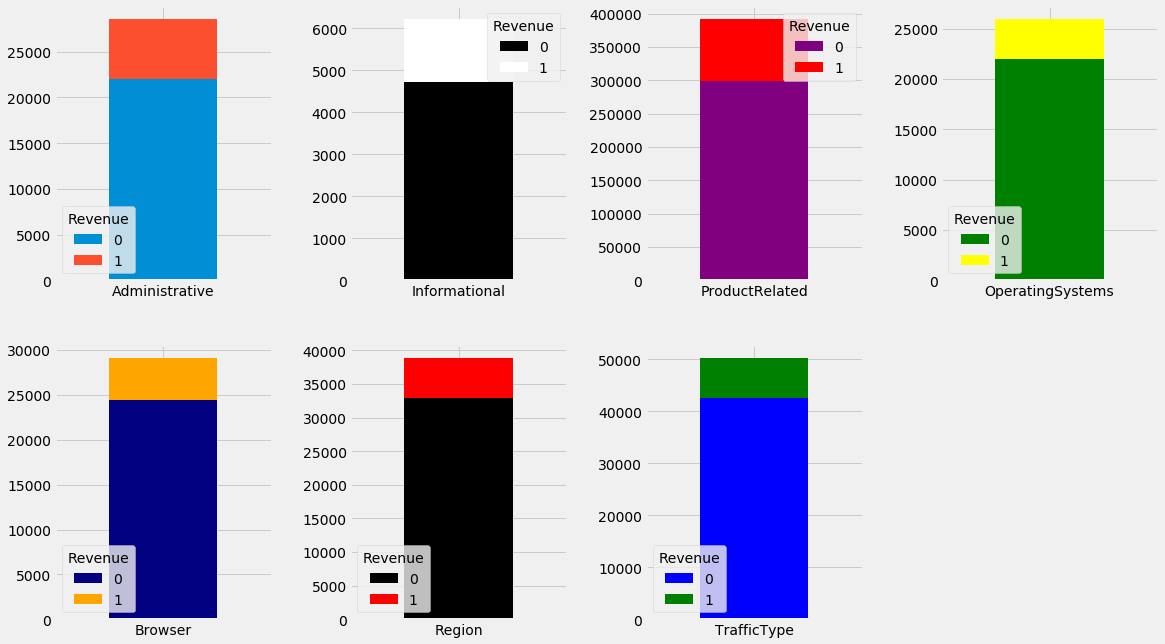

In [26]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(nrows = 2, ncols = 4,figsize = (17,10))
fig.tight_layout(pad = 3)


rev_p1 = pd.DataFrame(data.groupby('Revenue')['Administrative'].sum()).T
rev_p1.plot.bar(stacked=True,ax=ax[0,0])
ax[0,0].set_xticklabels(['Administrative'], rotation=360)
plt.legend(loc='best')


rev_p2 = pd.DataFrame(data.groupby('Revenue')['Informational'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[0,1],color = ['black','white'])
ax[0,1].set_xticklabels(['Informational'], rotation=360)
plt.legend(loc='best')

rev_p2 = pd.DataFrame(data.groupby('Revenue')['ProductRelated'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[0,2],color = ['purple','red'])
ax[0,2].set_xticklabels(['ProductRelated'], rotation=360)
plt.legend(loc='best')



rev_p2 = pd.DataFrame(data.groupby('Revenue')['OperatingSystems'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[0,3],color = ['green','yellow'])
ax[0,3].set_xticklabels(['OperatingSystems'], rotation=360)


rev_p2 = pd.DataFrame(data.groupby('Revenue')['Browser'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[1,0],color = ['navy','orange'])
ax[1,0].set_xticklabels(['Browser'], rotation=360)


rev_p2 = pd.DataFrame(data.groupby('Revenue')['Region'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[1,1],color = ['black','red'])
ax[1,1].set_xticklabels(['Region'], rotation=360)


rev_p2 = pd.DataFrame(data.groupby('Revenue')['TrafficType'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[1,2],color = ['blue','green'])
ax[1,2].set_xticklabels(['TrafficType'], rotation=360)

fig.delaxes(ax[1,3])

Columns :'Administrative', 'Informational' and 'ProductRelated' there are the most related with the revenue results.

# ML Data Preprocessing

Here we will drop unnecessary columns - columns which do not have a correlation with any other columns in the dataset

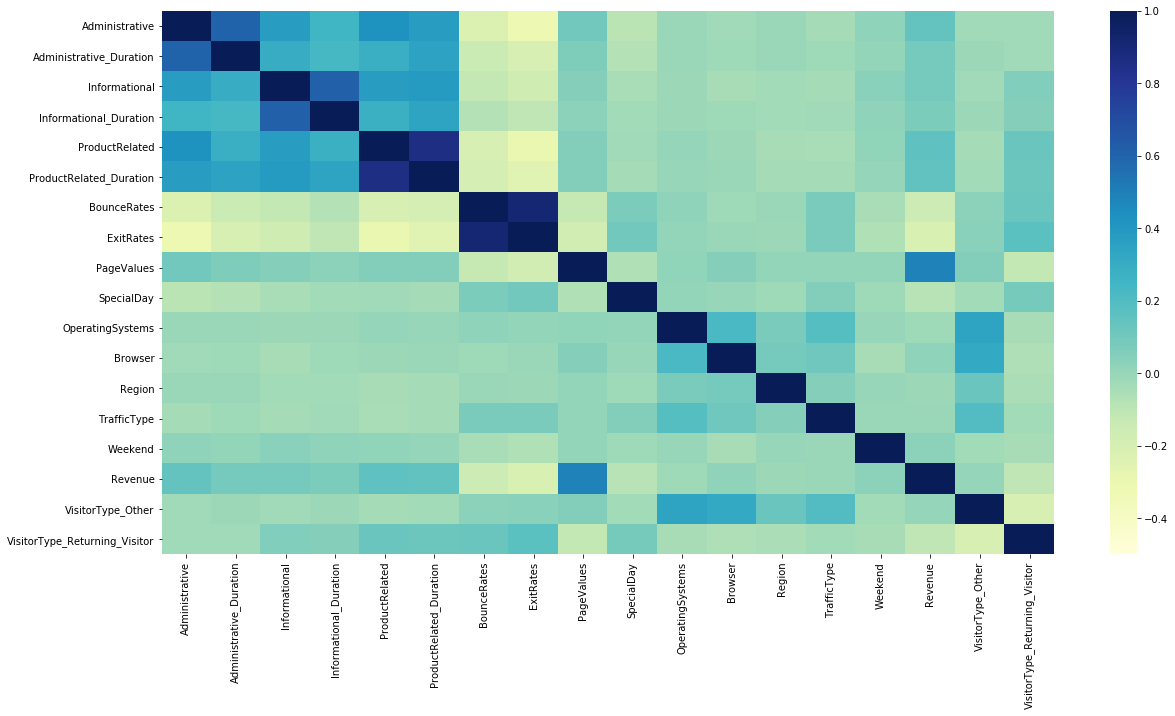

In [16]:
cor = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, vmin=-0.5, cmap="YlGnBu")

In [17]:
#data = data.drop(['BounceRates', 'ExitRates', 'SpecialDay',  'OperatingSystems', 'Browser', 'VisitorType', 'Month', 'Region', 'TrafficType', 'Weekend'], axis = 1)

In [18]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

Another way to visualize the correlation matrix

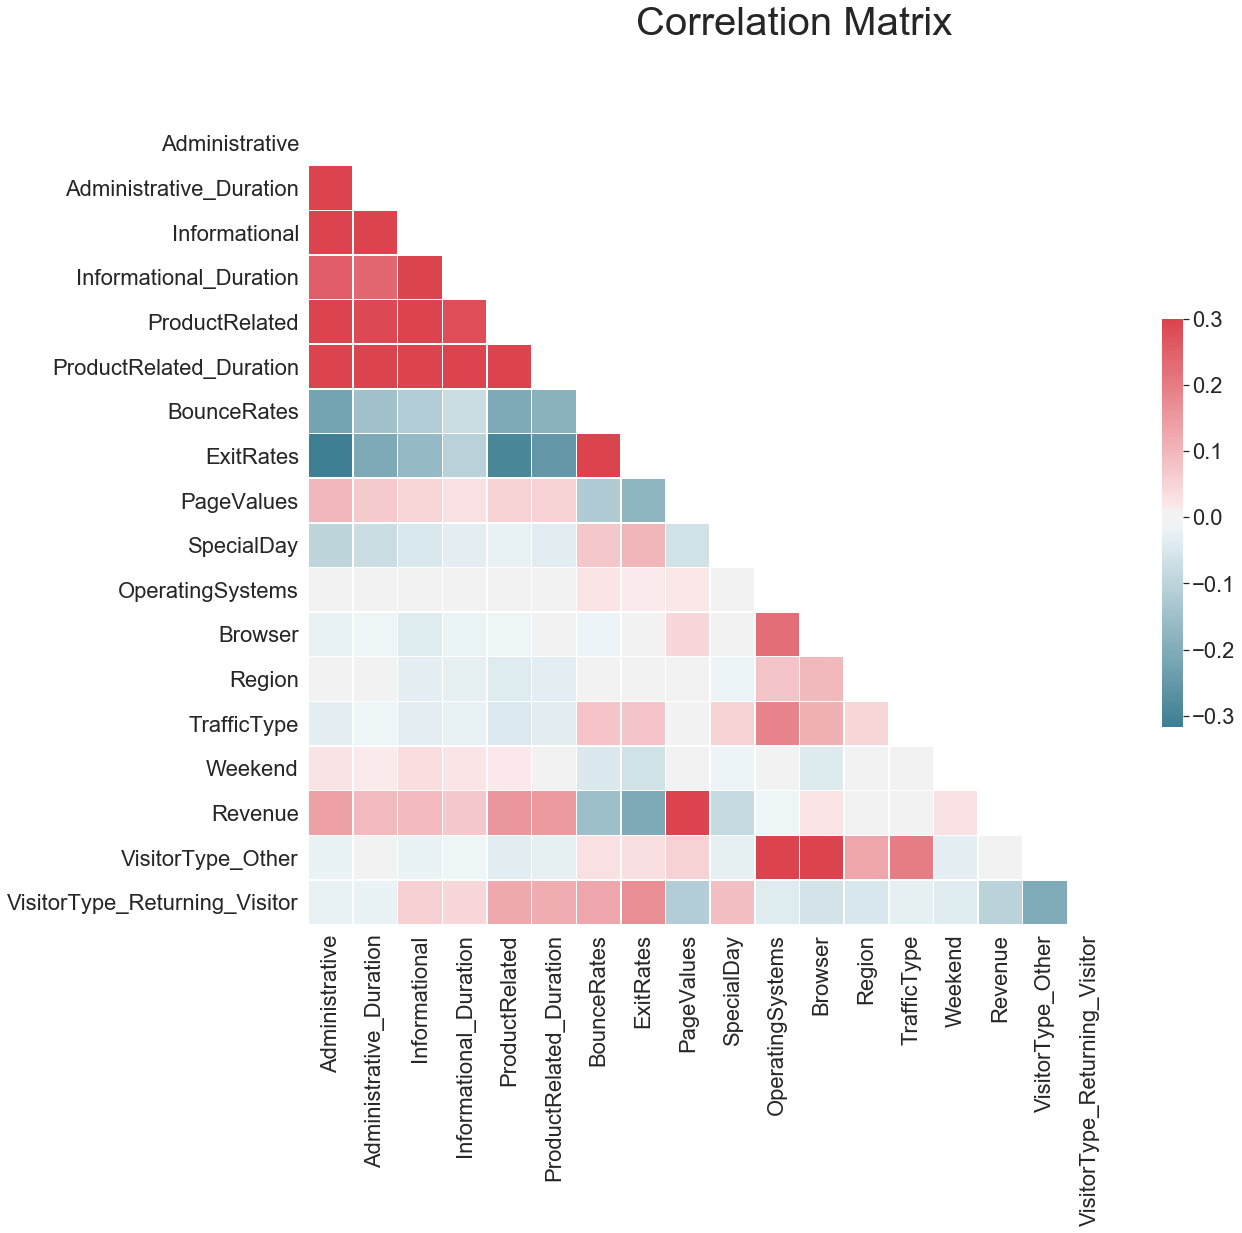

In [19]:
## Correlation Matrix
sns.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The more red the square is, the higher the positive correlation is to the other column. The more blue the square is, the higher the negative correlation is to the other column. 

Standardization of data

In [20]:
X = data.drop('Revenue', axis=1)
y = data['Revenue']

In [21]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [22]:
X.iloc[220]

Administrative                     2.000000
Administrative_Duration           38.000000
Informational                      0.000000
Informational_Duration             0.000000
ProductRelated                    14.000000
ProductRelated_Duration          643.000000
BounceRates                        0.000000
ExitRates                          0.013333
PageValues                        35.092800
SpecialDay                         0.000000
OperatingSystems                   2.000000
Browser                            2.000000
Region                             5.000000
TrafficType                        1.000000
Weekend                            0.000000
VisitorType_Other                  0.000000
VisitorType_Returning_Visitor      1.000000
Name: 220, dtype: float64

In [23]:
scaled = StandardScaler().fit_transform(X)

In [24]:
scaled

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.55055169,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.55055169,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.55055169,
        -0.08331632,  0.41062101],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  1.81635987,
        -0.08331632,  0.41062101],
       [ 0.50722805, -0.03291592, -0.3964779 , ..., -0.55055169,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  1.81635987,
        -0.08331632, -2.43533571]])

In [25]:
scaled = pd.DataFrame(data=scaled, columns=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
        'VisitorType_Other', 'VisitorType_Returning_Visitor'])

# ML Models

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled, y, test_size=0.2, random_state=1234)

In [27]:
Y_train

1991     0
1158     0
7802     0
9250     0
2055     0
        ..
11468    1
7221     0
1318     0
8915     0
11055    0
Name: Revenue, Length: 9864, dtype: int64

## Logisitic Regression 

In [28]:
model1 = LogisticRegression()

Fit the model according to the given training data

In [40]:
model1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predict class labels for sample in X

In [41]:
y_pred=model1.predict(X_test)

Get accuracy and recall of the model

In [42]:
print("Accuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_pred),3)))  
print("Recall\t{}".format(round(metrics.recall_score(Y_test, y_pred),3)))

Accuracy	0.872
Recall	0.766


Get the parameters for this estimato

In [43]:
model1.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

GridSearchCV

It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.The performance of a model significantly depends on the value of hyperparameters. 

In [44]:
parametres = {"C": [0.001, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,0.07, 0.1]}
model1_gs = GridSearchCV(model1, param_grid=parametres,
                         cv = 10, scoring='accuracy')

run fit with all sets of parameters

In [45]:
model1_gs.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                               0.07, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

get the accuracy of the best 

In [46]:
print(model1_gs.best_params_, "\nAcc: {}".format(round(model1_gs.best_score_,3)))

{'C': 0.1} 
Acc: 0.869


Plotting all model results vs their accuracies

Best_parameter {'C': 0.1} 
Acc: 0.869


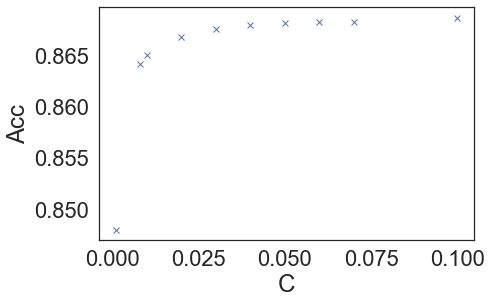

In [47]:
df_search = pd.DataFrame.from_dict(model1_gs.cv_results_)
plt.xlabel('C')
plt.ylabel('Acc')
_ = plt.plot(df_search['param_C'], df_search['mean_test_score'], 'x')
print('Best_parameter',model1_gs.best_params_, "\nAcc: {}".format(round(model1_gs.best_score_,3)))

Find best threshold

We have to choose the threshold for separate our results which are continuous values into a binary option of Yes or Not (1 or 0) about the revenue probability.

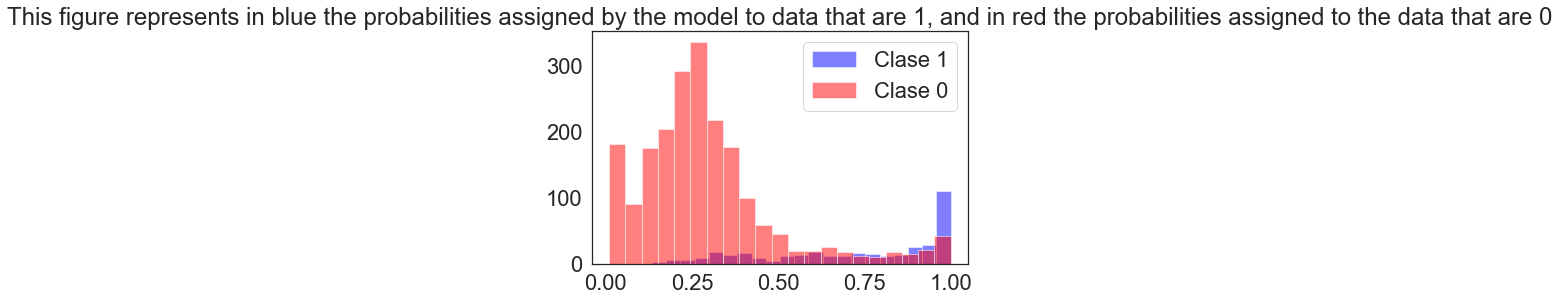

In [48]:
model1 = LogisticRegression(class_weight='balanced', C=model1_gs.best_params_.get("C"))
model1.fit(X_train, Y_train)
y_test_pred_prob = model1.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

def representation_seuil(x_1, x_0, n_bins=11, title='This figure represents in blue the probabilities assigned by the model to data that are 1, and in red the probabilities assigned to the data that are 0', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='blue')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='red')
    plt.title(title)
    plt.legend(loc='best') 
    
representation_seuil(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0)    

Because the sensitivity represents the percentage of true positive on all the positives values, it is a data which is important for our cases since we need to find which visitors have the intention to buy (Revenue=True)

In [49]:
def bestThreshold(threshold):
    y_THRESHOLD = 1*(y_test_pred_prob[:, 1] > threshold)

    print(u"Confusion Matrix\n", metrics.confusion_matrix(Y_test, y_THRESHOLD))
    print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_THRESHOLD),3)))  
    print("Sensitivity\t{}".format(round(metrics.recall_score(Y_test, y_THRESHOLD),3)))
    print(u"Precision\t{}".format(round(metrics.precision_score(Y_test, y_THRESHOLD),3)))
    return round(metrics.accuracy_score(Y_test, y_THRESHOLD),3)*100

In [50]:
bestThreshold(0.7)

Confusion Matrix
 [[1952  130]
 [ 158  226]]

Accuracy	0.883
Sensitivity	0.589
Precision	0.635


88.3

In [51]:
bestThreshold(0.8)

Confusion Matrix
 [[1982  100]
 [ 194  190]]

Accuracy	0.881
Sensitivity	0.495
Precision	0.655


88.1

In [52]:
bestThreshold(0.9)

Confusion Matrix
 [[2015   67]
 [ 232  152]]

Accuracy	0.879
Sensitivity	0.396
Precision	0.694


87.9

We will keep the threshold of 0.8 which allows to have a good trade-off between accuracy and recall

In [53]:
LogRecAcc = bestThreshold(0.7)

Confusion Matrix
 [[1982  100]
 [ 194  190]]

Accuracy	0.881
Sensitivity	0.495
Precision	0.655


In [54]:
y_test_pred_prob = model1.predict_proba(X_test)
y_test_pred_prob

array([[0.6182905 , 0.3817095 ],
       [0.97530372, 0.02469628],
       [0.8550193 , 0.1449807 ],
       ...,
       [0.08950718, 0.91049282],
       [0.7801548 , 0.2198452 ],
       [0.7757104 , 0.2242896 ]])

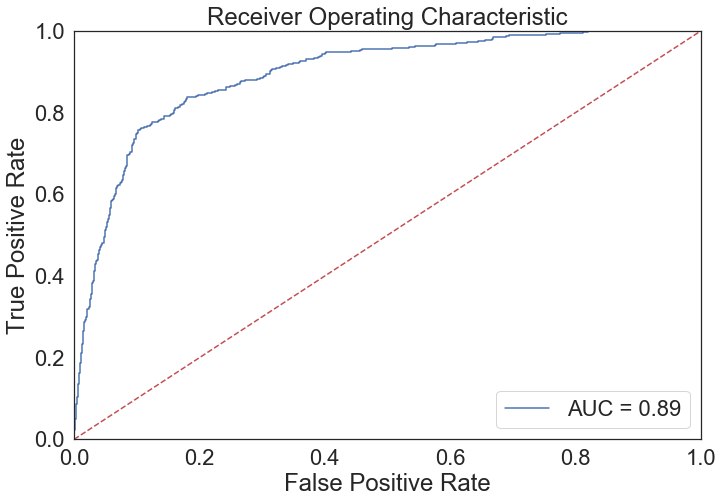

In [55]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC ranges in value from 0 to 1. Our model has AUC = 0.89 which means it is a model whose predictions are 89 % correct.

## Naive Bayes Classifier 

Fit Gaussian Naive Bayes Classier to training data

In [56]:
gnb = GaussianNB() 

Fit the model according to the given training data

In [57]:
gnb.fit(X_train, Y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

Make prediction using our test data and model

In [58]:
y_pred = gnb.predict(X_test) 

Comparing our prediction to response values

In [59]:
NBCAcc = round(metrics.accuracy_score(Y_test, y_pred)*100,2)
print("Gaussian Naive Bayes model accuracy(in %):", NBCAcc)

Gaussian Naive Bayes model accuracy(in %): 80.86


Confusion Matrix

In [60]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1743,  339],
       [ 133,  251]], dtype=int64)

True Positive: 1858 - correctly predicted positive class

True Negative: 227 - correctly predicted negative class

False Positive: 224 - type 1 error

False Negative: 157 - type 2 error

## Random Forest Classifier

Fit Random Forest Classifier to our Training Data

In [61]:
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

make prediction using our test data and model

In [62]:
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

Comparing our prediciton to response values

In [63]:
RFCAcc =  round(metrics.accuracy_score(Y_test, y_pred_rfc)*100,2)
print('Random Forest Classifier model accuracy(in %):', RFCAcc)

Random Forest Classifier model accuracy(in %): 90.27


Confusion matrix

In [64]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1743,  339],
       [ 133,  251]], dtype=int64)

True Positive: 1858 - correctly predicted positive class

True Negative: 227 - correctly predicted negative class

False Positive: 224 - type 1 error

False Negative: 157 - type 2 error

Calculate ROC AUC for our best performing classifier, the Random Forest Classifier

The area under the ROC curve is: 0.91


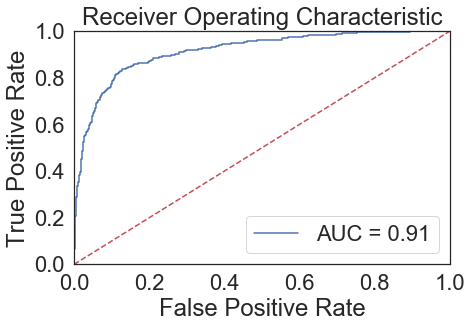

In [65]:
roc_value = roc_auc_score(Y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(Y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Graph showing the performance of a classification model at all classification thresholds

AUC ( Area under the ROC Curve) :
AUC ranges in value from 0 to 1. Our model has AUC = 0.91 which means it is a model whose predictions are 91 % correct.

Calculate Log Loss

In [66]:
rfc_log_loss = log_loss(y_pred_rfc, y_prob_rfc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))

Log Loss: 0.17


## Extra Tree Classifier 

Fit Extra Trees Classifier to our Training Data

In [67]:
etc = ExtraTreesClassifier(random_state=2, n_estimators=1000)
etc.fit(X_train, Y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

make prediction using our test data and model

In [68]:
y_pred_etc = etc.predict(X_test)
y_prob_etc = etc.predict_proba(X_test)[:, 1]

Comparing our prediciton to response values

In [69]:
ETCAcc = round(metrics.accuracy_score(Y_test, y_pred_etc)*100,2)
print('Extra Trees Classifier model accuracy(in %):', ETCAcc)

Extra Trees Classifier model accuracy(in %): 89.46


Confusion Matrix

In [70]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1743,  339],
       [ 133,  251]], dtype=int64)

True Positive: 1858 - correctly predicted positive class

True Negative: 227 - correctly predicted negative class

False Positive: 224 - type 1 error

False Negative: 157 - type 2 error

## Neural Networks Classification 

We create a Sequential model and add layers one at a time. 
Our input layer has 17 neurons. 

There are 2 hidden layers both with 32 neurons and using the most used activation function : ReLU.

The output layer has the activation function sigmoid. The main reason sigmoid is used are because we have to predict the probability as an output and sigmoid is used for binary classification which is our case for this projet. The '1' specifies that there is only one output value which is the label of the highest probability. 

Dense suggests that the layers are fully connected by the neurons in a network layer. 

In [29]:
model = Sequential([
    Flatten(input_shape=(17,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

The Adam optimizer is chosen as it is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.

The loss function is 'binary_crossentropy' as it is the loss function that is used in binary classification tasks. 

Metrics is accuracy as we want to have the accuracy of the model. 


In [40]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
hist = model.fit(X_train, Y_train, batch_size=1)

9864/9864 [==============================] - 8s 822us/step - loss: 0.2550 - accuracy: 0.8972


In [42]:
hist.history['accuracy'][0] * 100


89.72019553184509

In [74]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
NNCAcc = test_acc*100
print('Test accuracy:', NNCAcc)

78/78 [==============================] - 0s 953us/step - loss: 0.2519 - accuracy: 0.8970
Test accuracy: 89.6999180316925


In [75]:
y_pred = model.predict(X_test)

In [76]:
y_pred = (y_pred > 0.5)

In [77]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1992,   90],
       [ 164,  220]], dtype=int64)

True Positive: 2013 - correctly predicted positive class

True Negative: 2020 - correctly predicted negative class

False Positive: 69 - type 1 error

False Negative: 182 - type 2 error

## Accuracy of the models 

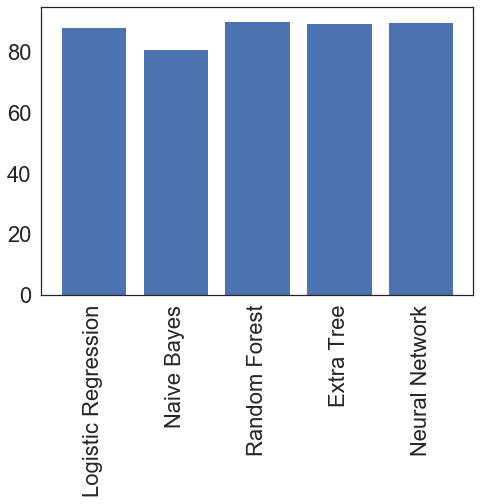

In [78]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs =['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Extra Tree', 'Neural Network']
students = [LogRecAcc, NBCAcc, RFCAcc, ETCAcc, NNCAcc ]
ax.bar(langs,students)
plt.xticks(rotation=90)
plt.show()

## Feature importance

To see if we can improve our model, let us track the feature importance of each of our features to see which features matter to the outcome of the prediction.

We want to see which variables contribute the most to the model

In [79]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. Feature 8 (0.683056)
2. Feature 7 (0.079474)
3. Feature 5 (0.061220)
4. Feature 4 (0.041496)
5. Feature 6 (0.039001)
6. Feature 0 (0.027073)
7. Feature 1 (0.022268)
8. Feature 16 (0.017502)
9. Feature 3 (0.007521)
10. Feature 2 (0.005535)
11. Feature 13 (0.004882)
12. Feature 11 (0.002735)
13. Feature 9 (0.002455)
14. Feature 12 (0.002431)
15. Feature 10 (0.002234)
16. Feature 14 (0.000784)
17. Feature 15 (0.000332)


Generating a dataframe for our feature importance

In [80]:
col_names = pd.Series([col for col in X_train.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)
imp_sorted

,Importance
PageValues,0.683056
ExitRates,0.079474
ProductRelated_Duration,0.061220
ProductRelated,0.041496
BounceRates,0.039001
Administrative,0.027073
Administrative_Duration,0.022268
VisitorType_Returning_Visitor,0.017502
Informational_Duration,0.007521
Informational,0.005535


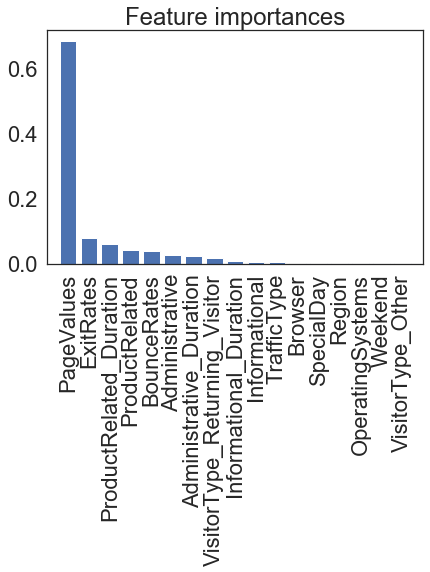

In [81]:
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),importances[indices])
plt.xticks(range(X_train.shape[1]), imp_sorted.index, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

We want to simplify our model to only use features that may heavily contribute to our classification. Using our feature importance chart, we will take the top 5 most impactful features: PageValues, ExitRates, ProductRelated_Duration, BounceRates, ProductRelated. In addition, after creating the simplififed model, we want to measure the effectiveness of our model by using cross validation.

Creating simple model dataset

In [82]:
X_train = X_train[['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated', 'BounceRates']]
X_test = X_test[['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated', 'BounceRates']]

In [83]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, Y_train)
y_pred=model.predict(X_test)
LogRegAcc_2 = round(metrics.accuracy_score(Y_test, y_pred)*100,3)
print("Accuracy : "+ str(LogRegAcc_2))  


Accuracy : 86.659


In [84]:
gnb = GaussianNB() 
gnb.fit(X_train, Y_train) 
y_pred = gnb.predict(X_test) 
NBCAcc_2 = round(metrics.accuracy_score(Y_test, y_pred)*100,2)
print("Gaussian Naive Bayes model accuracy(in %):", NBCAcc_2)

Gaussian Naive Bayes model accuracy(in %): 84.55


In [85]:
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, Y_train)
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]
RFCAcc_2 =  round(metrics.accuracy_score(Y_test, y_pred_rfc)*100,2)
print('Random Forest Classifier model accuracy(in %):', RFCAcc_2)

Random Forest Classifier model accuracy(in %): 89.94


In [86]:
etc = ExtraTreesClassifier(random_state=2, n_estimators=1000)
etc.fit(X_train, Y_train)
y_pred_etc = etc.predict(X_test)
y_prob_etc = etc.predict_proba(X_test)[:, 1]
ETCAcc_2 = round(metrics.accuracy_score(Y_test, y_pred_etc)*100,2)
print('Extra Trees Classifier model accuracy(in %):', ETCAcc_2)

Extra Trees Classifier model accuracy(in %): 88.93


In [87]:
model = Sequential([
    Flatten(input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train, batch_size=1)
test_loss, test_acc = model.evaluate(X_test, Y_test)
NNCAcc_2 = test_acc*100
print('Test accuracy:', NNCAcc_2)

78/78 [==============================] - 0s 831us/step - loss: 0.2647 - accuracy: 0.8909
Test accuracy: 89.09164667129517


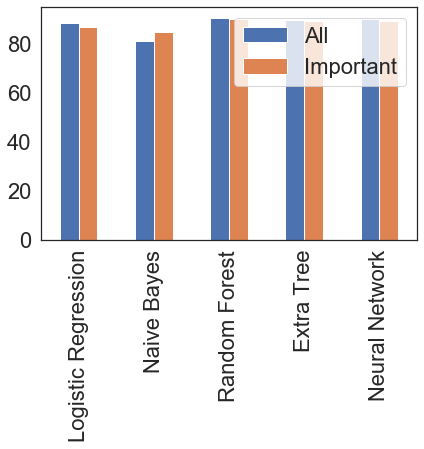

In [88]:
models =['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Extra Tree', 'Neural Network']
All = [LogRecAcc, NBCAcc, RFCAcc, ETCAcc, NNCAcc ]
Important = [LogRegAcc_2, NBCAcc_2, RFCAcc_2, ETCAcc_2, NNCAcc_2 ]

df = pd.DataFrame({'All': All,
                   'Important': Important}, index=models)
ax = df.plot.bar(rot=90)